In [6]:
import os

import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
import numpy as np

Encoder
joint_Encoder_250197.csv (4400,)
joint_Encoder_541.csv (4400,)
joint_Encoder_1743.csv (4400,)
f
joint_f_1743.csv (4400,)
joint_f_541.csv (4400,)
joint_f_250197.csv (4400,)


/tmp/ipykernel_2584328/1484082125.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


g
joint_g_250197.csv (4400,)
joint_g_1743.csv (4400,)
joint_g_541.csv (4400,)
PropaneCombustion
joint_PropaneCombustion_541.csv (4400,)
joint_PropaneCombustion_250197.csv (4400,)
joint_PropaneCombustion_1743.csv (4400,)
BSJ
joint_BSJ_1743.csv (4400,)
joint_BSJ_250197.csv (4400,)
joint_BSJ_541.csv (4400,)
RoeFlux_3d
joint_RoeFlux_3d_250197.csv (4400,)
joint_RoeFlux_3d_1743.csv (4400,)
joint_RoeFlux_3d_541.csv (4400,)
RoeFlux_1d
joint_RoeFlux_1d_541.csv (4400,)
joint_RoeFlux_1d_1743.csv (4400,)
joint_RoeFlux_1d_250197.csv (4400,)
RobotArm_6DOF
joint_RobotArm_6DOF_1743.csv (4400,)
joint_RobotArm_6DOF_541.csv (4400,)
joint_RobotArm_6DOF_250197.csv (4400,)
MLP
joint_MLP_1743.csv (4400,)
joint_MLP_250197.csv (4400,)
joint_MLP_541.csv (4400,)
HumanHeartDipole
joint_HumanHeartDipole_1743.csv (4400,)
joint_HumanHeartDipole_541.csv (4400,)
joint_HumanHeartDipole_250197.csv (4400,)


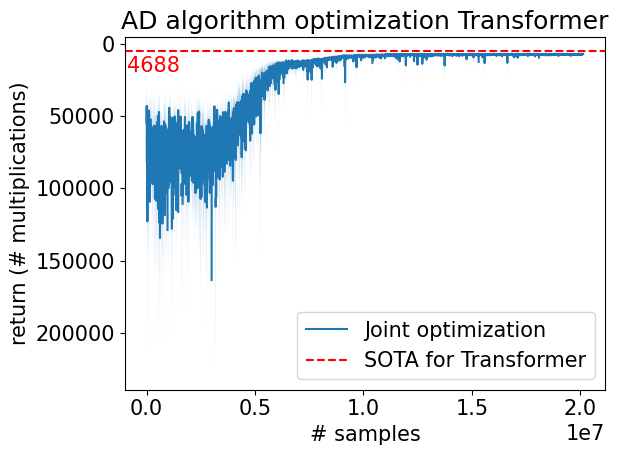

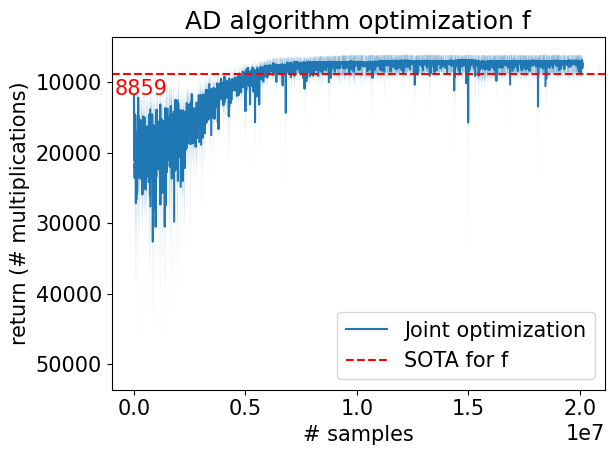

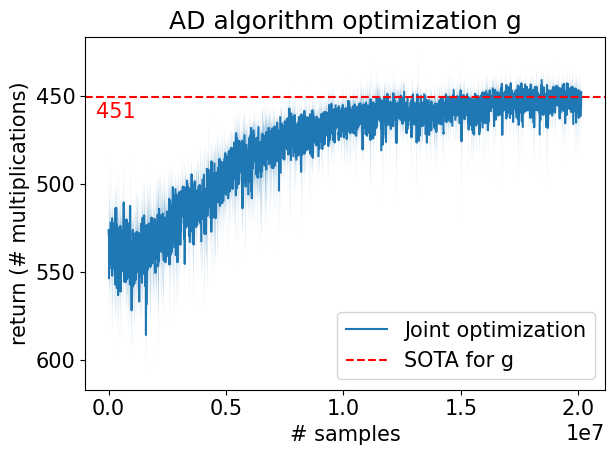

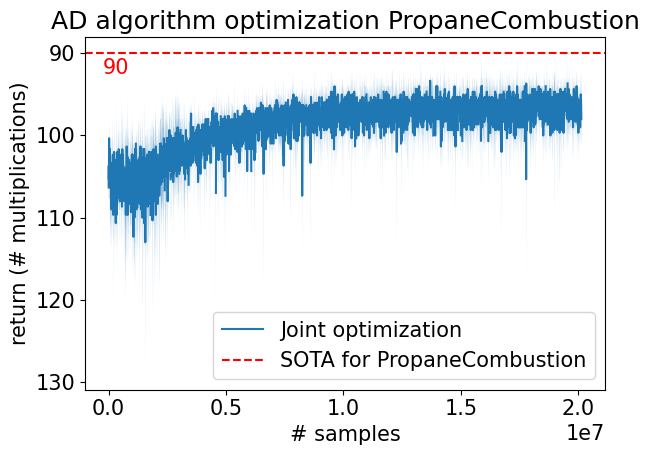

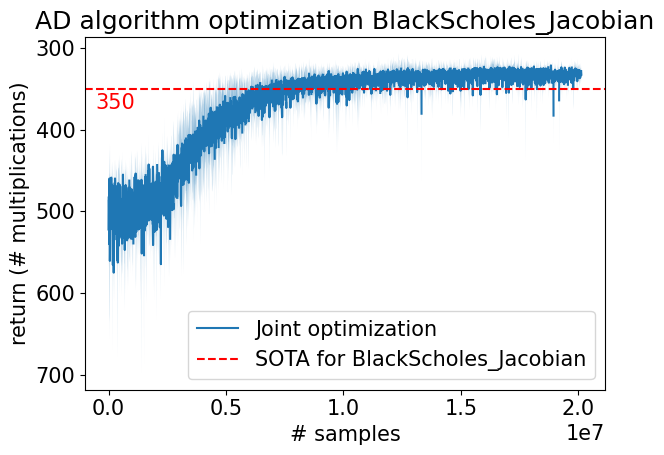

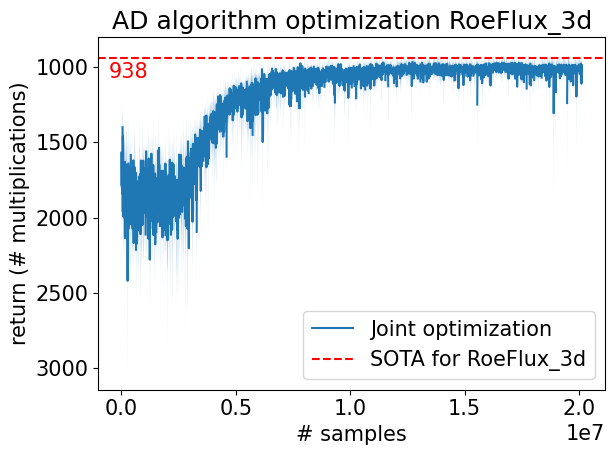

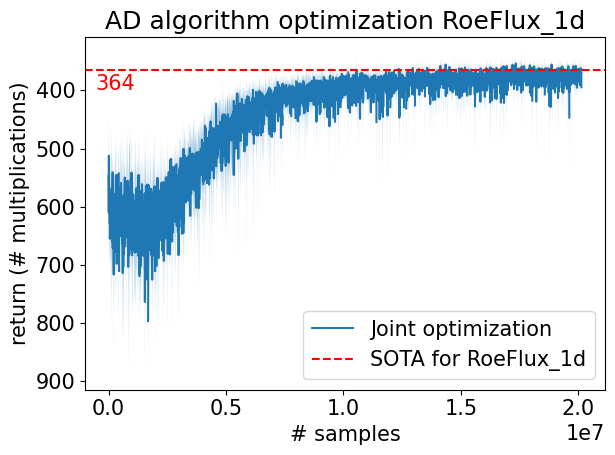

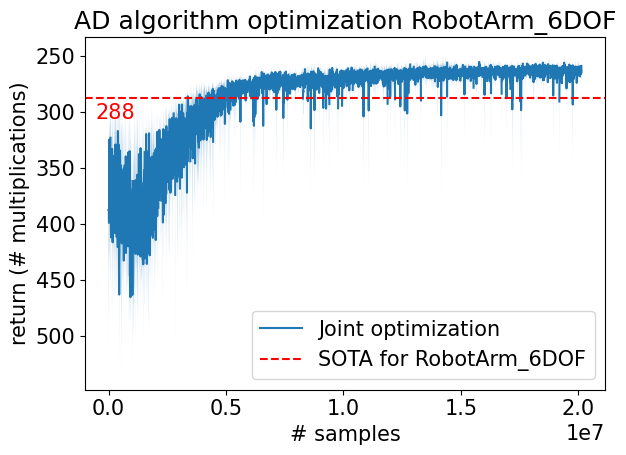

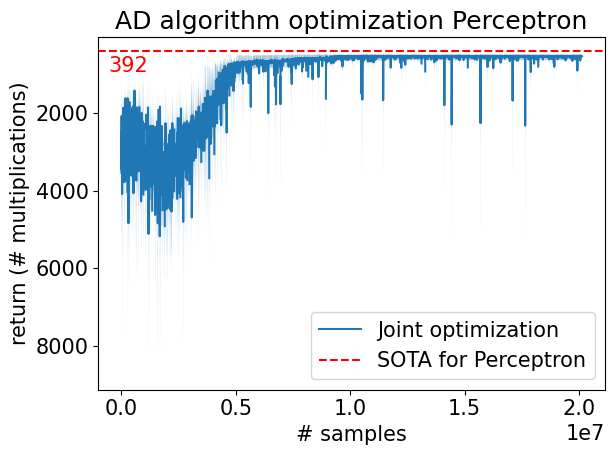

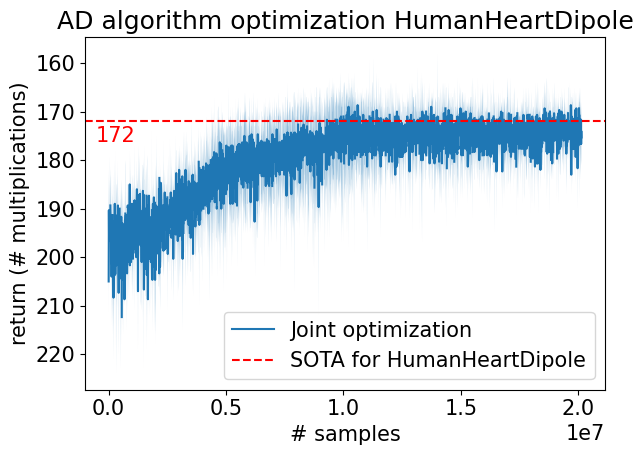

In [7]:
font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 15}

plt.rc("font", **font)

path = "A0_data/" 
l = 4400

info = {"BSJ": (350, "BlackScholes_Jacobian"),
        "Encoder": (4688, "Transformer"),
        "f": (9333, "f"),
        "g": (451, "g"),
        "HumanHeartDipole": (172, "HumanHeartDipole"),
        "MLP": (392, "Perceptron"),
        "PropaneCombustion": (90, "PropaneCombustion"),
        "RobotArm_6DOF": (288, "RobotArm_6DOF"),
        "RoeFlux_1d": (364, "RoeFlux_1d"),
        "RoeFlux_3d": (938, "RoeFlux_3d"),}

for dir in os.listdir(path=os.path.join(os.getcwd(), path)):
			runs = []
			taskname = str(dir)
			print(dir)
			for file in os.listdir(path=os.path.join(os.getcwd(), path, dir)):
							if file.endswith(".csv"):
											data = np.genfromtxt(os.path.join(os.getcwd(), path, dir, file), delimiter=",", skip_header=1)
											num_samples = data[:l, 0]*32*143
											num_muls = data[:l, 1]
											print(file, num_muls.shape)
											runs.append(num_muls)

			data = jnp.stack(runs, axis=0)

			data_mean = jnp.mean(data, axis=0)
			data_max = jnp.max(data, axis=0)
			data_min	= jnp.min(data, axis=0)
			data_err = jnp.stack([data_min, data_max], axis=0)

			sota = info[taskname][0]
			name = info[taskname][1]
			fig, ax = plt.subplots()
			ax.plot(num_samples, data_mean, label="Joint optimization")
			ax.fill_between(num_samples, data_min, data_max, alpha=0.5)
			ax.axhline(y=-sota, color="r", linestyle="--", label=f"SOTA for {name}")
			ax.annotate(str(sota), (num_samples[0], -sota), textcoords="offset points", xytext=(5, -15), ha="center", color="red")
			ax.set_xlabel("# samples")
			ax.set_ylabel("return (# multiplications)")
			ax.set_title(f"AD algorithm optimization {name}")

			ticks = ax.get_yticks()
			labels = ax.get_yticklabels()
			labels = [str(int(-t)) for t in ticks]
			ax.set_yticklabels(labels)
			plt.tight_layout()
			ax.legend(loc="lower right")